In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Importação Train
### Treino e Validação

In [2]:
df_train = pd.read_csv('train.csv')

df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEA

In [44]:
df_test = pd.read_csv('test.csv')

df_test.head(10)

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,NaN,A
5,e656d6bad65c93fb2880f1eba5037008c8e75774,43,RS,18,M,3,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,414.5,568.5,542.5,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,E,E,C,B,B,A,NaN,A
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,35,SP,17,F,1,1,2,0,3,1.0,0,4.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,485.7,654.6,606.6,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,D,E,H,D,B,A,NaN,D
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,23,CE,17,F,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.2,521.0,451.8,0,1.0,100.0,80.0,80.0,100.0,60.0,420.0,D,C,B,A,A,A,NaN,A
8,043c544a2104aa8a9849f1a703a08d37a2f16839,51,MT,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,414.4,577.6,548.6,1,1.0,120.0,160.0,160.0,140.0,160.0,740.0,B,D,C,A,A,B,D,A
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,15,PA,17,M,3,2,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,456.8,518.5,488.7,0,1.0,120.0,120.0,120.0,120.0,100.0,580.0,B,C,B,A,A,A,NaN,A


In [3]:
df_train.shape

(13730, 167)

In [4]:
check = df_train.isna().sum()
print(check.to_string())

Unnamed: 0                         0
NU_INSCRICAO                       0
NU_ANO                             0
CO_MUNICIPIO_RESIDENCIA            0
NO_MUNICIPIO_RESIDENCIA            0
CO_UF_RESIDENCIA                   0
SG_UF_RESIDENCIA                   0
NU_IDADE                           0
TP_SEXO                            0
TP_ESTADO_CIVIL                  528
TP_COR_RACA                        0
TP_NACIONALIDADE                   0
CO_MUNICIPIO_NASCIMENTO          609
NO_MUNICIPIO_NASCIMENTO          609
CO_UF_NASCIMENTO                 609
SG_UF_NASCIMENTO                 609
TP_ST_CONCLUSAO                    0
TP_ANO_CONCLUIU                    0
TP_ESCOLA                          0
TP_ENSINO                       9448
IN_TREINEIRO                       0
CO_ESCOLA                       9448
CO_MUNICIPIO_ESC                9448
NO_MUNICIPIO_ESC                9448
CO_UF_ESC                       9448
SG_UF_ESC                       9448
TP_DEPENDENCIA_ADM_ESC          9448
T

In [5]:
dfck = check.to_frame().reset_index()
dfck.columns = ['Coluna', 'Qtd_NAN']
dfck['Percentual'] = round((dfck['Qtd_NAN'] / df_train.shape[0]) * 100, 2)
dfck.head(10)

,Coluna,Qtd_NAN,Percentual
0,Unnamed: 0,0,0.00
1,NU_INSCRICAO,0,0.00
2,NU_ANO,0,0.00
3,CO_MUNICIPIO_RESIDENCIA,0,0.00
4,NO_MUNICIPIO_RESIDENCIA,0,0.00
5,CO_UF_RESIDENCIA,0,0.00
6,SG_UF_RESIDENCIA,0,0.00
7,NU_IDADE,0,0.00
8,TP_SEXO,0,0.00
9,TP_ESTADO_CIVIL,528,3.85


In [6]:
dftop = dfck.query('Percentual < 50')
dftop.head()

,Coluna,Qtd_NAN,Percentual
0,Unnamed: 0,0,0.0
1,NU_INSCRICAO,0,0.0
2,NU_ANO,0,0.0
3,CO_MUNICIPIO_RESIDENCIA,0,0.0
4,NO_MUNICIPIO_RESIDENCIA,0,0.0


In [7]:
dftop.tail()

,Coluna,Qtd_NAN,Percentual
162,Q046,0,0.0
163,Q047,0,0.0
164,Q048,0,0.0
165,Q049,0,0.0
166,Q050,0,0.0


In [8]:
dftop.shape

(147, 3)

In [61]:
#df_x = df_train[dftop.Coluna]

df_x = df_train[df_test.columns]
df_x['NU_NOTA_MT'] = df_train['NU_NOTA_MT']

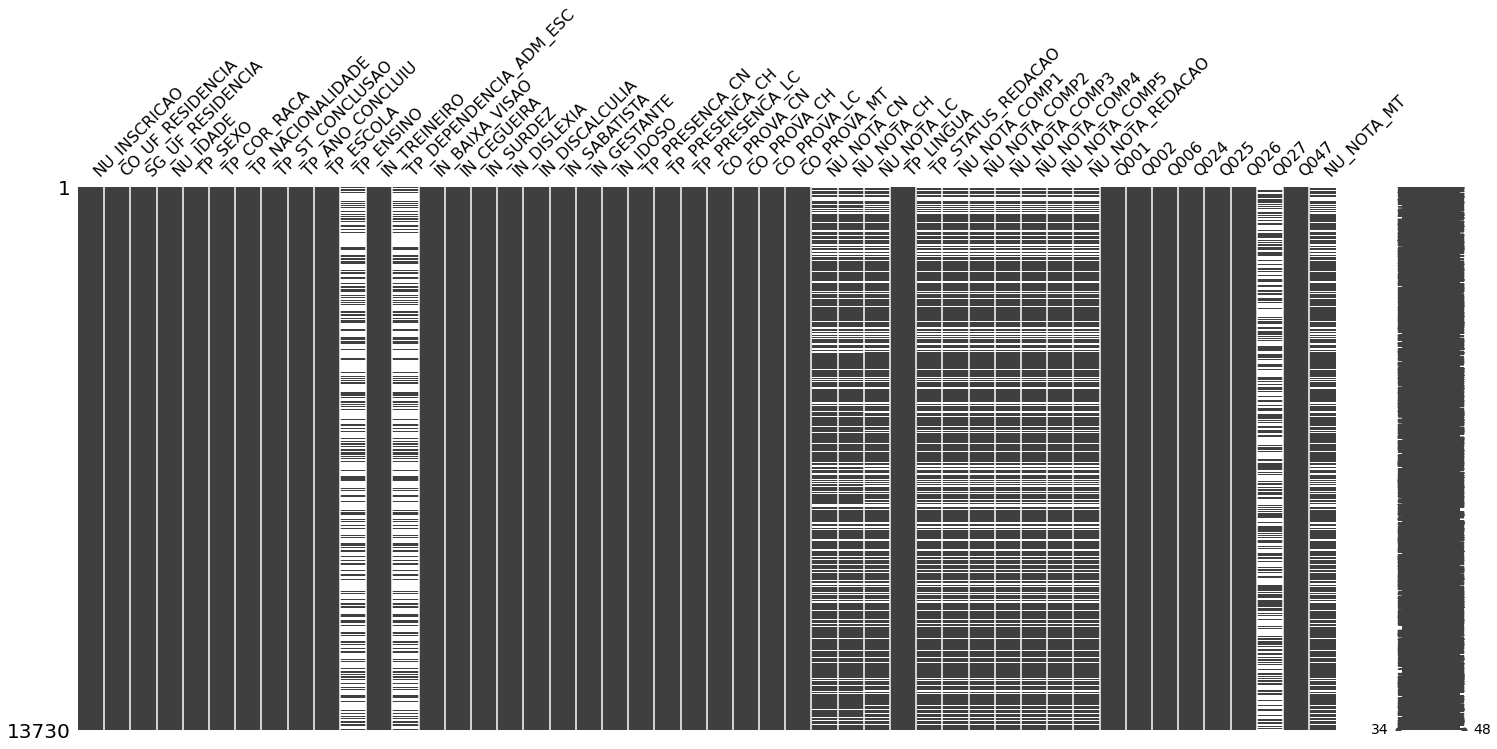

In [62]:
mtx = msno.matrix(df_x)

In [55]:
df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A


In [63]:
df_x = df_x.drop('SG_UF_RESIDENCIA', axis=1)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,NaN


In [64]:
dfck = df_x.isna().sum().to_frame().reset_index()
dfck.columns = ['Coluna', 'Qtd_NAN']
dfck['Percentual'] = round((dfck['Qtd_NAN'] / df_train.shape[0]) * 100, 2)

In [59]:
dfck.loc[21:30]

,Coluna,Qtd_NAN,Percentual
21,TP_PRESENCA_CH,0,0.00
22,TP_PRESENCA_LC,0,0.00
23,CO_PROVA_CN,0,0.00
24,CO_PROVA_CH,0,0.00
25,CO_PROVA_LC,0,0.00
26,CO_PROVA_MT,0,0.00
27,NU_NOTA_CN,3389,24.68
28,NU_NOTA_CH,3389,24.68
29,NU_NOTA_LC,3597,26.20
30,TP_LINGUA,0,0.00


In [65]:
colsTo0 = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO',
           'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

for i in colsTo0:
    df_x[i] = df_x[i].replace(np.nan, 0)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,F,3,1,3,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,NaN,A,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,F,0,1,1,9,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,M,2,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0.0


In [70]:
#df_x['TP_ESTADO_CIVIL'] = df_x['TP_ESTADO_CIVIL'].replace(np.nan, -1)
#df_x['CO_UF_NASCIMENTO'] = df_x['CO_UF_NASCIMENTO'].replace(np.nan, -1)

df_x['TP_ENSINO'] = df_x['TP_ENSINO'].replace(np.nan, -1)
df_x['TP_DEPENDENCIA_ADM_ESC'] = df_x['TP_DEPENDENCIA_ADM_ESC'].replace(np.nan, -1)
df_x['Q027'] = df_x['Q027'].replace(np.nan, -1)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,-1,A,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,F,3,1,3,0,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,-1,A,0.0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,F,0,1,1,9,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,0.0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,M,2,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0.0


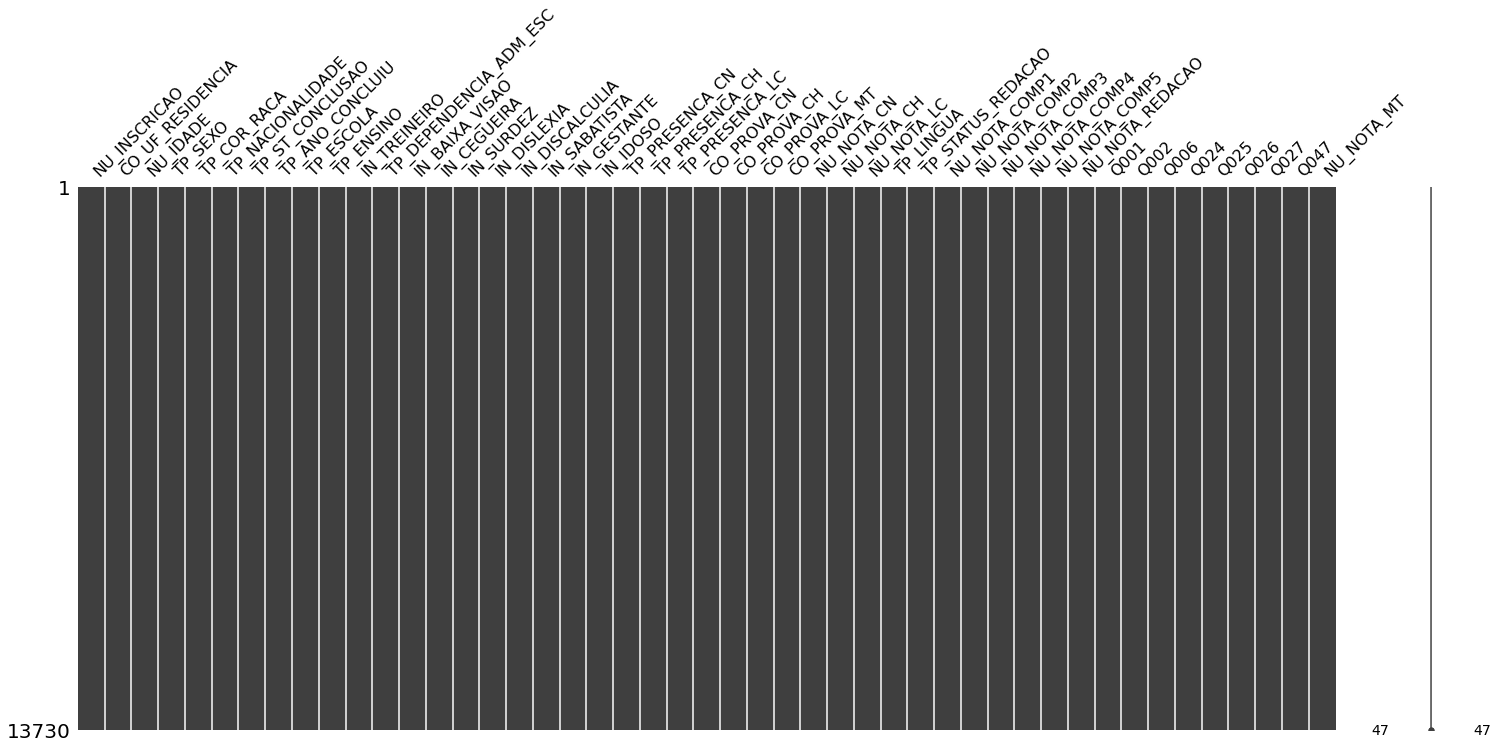

In [71]:
mtx = msno.matrix(df_x)

In [72]:
df_x['CO_PROVA_CN'].value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    3389
16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2    2646
b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7    2591
c8328ebc6f3238e06076c481bc1b82b8301e7a3f    2454
66b1dad288e13be0992bae01e81f71eca1c6e8a6    2399
1bcdece8fb1b952552b319e4e5512bbcf540e338      66
c87a85497686b3e7b3765f84a2ca95256f0f66aa      65
69ed2ddcb151cfebe3d2ae372055335ac7c8c144      60
03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2      59
a27a1efea095c8a973496f0b57a24ac6775d95b0       1
Name: CO_PROVA_CN, dtype: int64

In [73]:
df_x['CO_PROVA_CH'].value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    3389
9cd70f1b922e02bd33453b3f607f5a644fb9b1b8    2646
909237ab0d84688e10c0470e2997348aff585273    2591
f48d390ab6a2428e659c37fb8a9d00afde621889    2454
942ab3dc020af4cf53740b6b07e9dd7060b24164    2399
6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93      66
0fb4772fc6ee9b951ade2fbe6699cc37985c422e      65
c95541bf218d7ff70572ca4bcb421edeff05c6d5      60
f94e97c2a5689edd5369740fde9a927e23a9465f      59
d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee       1
Name: CO_PROVA_CH, dtype: int64

In [74]:
df_x['CO_PROVA_LC'].value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    3597
72f80e4b3150c627c7ffc93cfe0fa13a9989b610    2664
01abbb7f1a90505385f44eec9905f82ca2a42cfd    2454
01af53cd161a420fff1767129c10de560cc264dd    2403
5aebe5cad7fabc1545ac7fba07a4e6177f98483c    2364
fa86b01f07636b15adfd66b688c79934730721a6      67
9cbf6bf31d9d89a64ce2737ece4834fde4a95029      64
481058938110a64a272266e3892102b8ef0ca96f      63
44b09b311799bd684b3d02463bfa99e472c6adb3      54
Name: CO_PROVA_LC, dtype: int64

In [75]:
df_x['CO_PROVA_MT'].value_counts()

2d22ac1d42e6187f09ee6c578df187a760123ccf    3597
577f8968d95046f5eb5cc158608e12fa9ba34c85    2664
81d0ee00ef42a7c23eb04496458c03d4c5b9c31a    2454
97caab1e1533dba217deb7ef41490f52e459ab01    2403
767a32545304ed293242d528f54d4edb1369f910    2364
0e0082361eaceb6418bb17305a2b7912650b4783      67
0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e      64
73c5c86eef8f70263e4c5708d153cca123f93378      63
6d6961694e839531aec2d35bbd8552b55394a0d7      54
Name: CO_PROVA_MT, dtype: int64

In [76]:
co_provas = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
df_co_prova = df_x[co_provas]
df_co_prova.head()

,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT
0,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01
2,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
3,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf
4,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf


In [77]:
df_co_prova = pd.get_dummies(df_co_prova)
df_co_prova.head()

,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [78]:
df_x = df_x.drop(co_provas, axis=1)

df_x = pd.concat([df_x, df_co_prova], axis=1)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,M,1,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,-1,A,459.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,F,3,1,3,0,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,-1,A,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,F,0,1,1,9,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,M,2,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [79]:
df_x = pd.concat([df_x, pd.get_dummies(df_x['TP_SEXO'])], axis=1)

df_x = df_x.drop('TP_SEXO', axis=1)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,1,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,399.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,-1,A,459.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,3,1,3,0,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,D,D,C,A,A,A,-1,A,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,0,1,1,9,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,E,C,B,C,F,D,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,2,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E,D,C,A,A,B,F,A,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [80]:
#qColsFact = ['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 
#             'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020',
#             'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026',
#             'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049', 'Q050']

qColsFact = ['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

for i in qColsFact:
    df_x[i], uniques = pd.factorize(df_x[i], sort=True)

df_x.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,1,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,2,0,0,2,8,0,399.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,1,0,0,0,0,0,459.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,21,3,1,3,0,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,25,0,1,1,9,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,4,2,1,2,6,3,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,28,2,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,0,0,1,6,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [81]:
df_nu_inscricao = df_x['NU_INSCRICAO']
df_x = df_x.drop('NU_INSCRICAO', axis=1)

In [82]:
df_x.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,NU_NOTA_MT,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,43,24,1,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,3,3,2,0,0,2,8,0,399.4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,23,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,1,0,0,0,0,0,459.8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,23,21,3,1,3,0,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3,2,0,0,0,0,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,33,25,0,1,1,9,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,4,2,1,2,6,3,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,13,28,2,1,1,4,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3,2,0,0,1,6,0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Correlações

In [32]:
#fig, ax = plt.subplots(figsize=(20,10)) 

corr = df_x.corr()
#hm = sns.heatmap(corr, xticklabels=True, yticklabels=True, annot=True, linewidths=.5, ax=ax)
#hm

## RFE

In [33]:
"""
X = df_x
y = df_x['NU_NOTA_MT']

estimator = SVR(kernel="linear")
rfe_selector = RFE(estimator=estimator, n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(X, y)

rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
"""

'\nX = df_x\ny = df_x[\'NU_NOTA_MT\']\n\nestimator = SVR(kernel="linear")\nrfe_selector = RFE(estimator=estimator, n_features_to_select=10, step=10, verbose=5)\nrfe_selector.fit(X, y)\n\nrfe_support = rfe_selector.get_support()\nrfe_feature = X.loc[:,rfe_support].columns.tolist()\nprint(str(len(rfe_feature)), \'selected features\')\n'

## Modelo

In [132]:
y = df_x['NU_NOTA_MT']
df_x = df_x.drop('NU_NOTA_MT', axis=1)
X = df_x

lm = linear_model.LinearRegression()
model = lm.fit(X, y)

print(model.score(X, y))
print(model.intercept_)

0.9205362815543672
16.052558703701436


## Teste

In [168]:
df_t = df_test
df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,-1,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,-1,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,-1,A


In [169]:
for i in colsTo0:
    if (i != 'NU_NOTA_MT'):
        df_t[i] = df_t[i].replace(np.nan, 0)

df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,-1,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,-1,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,-1,A


In [170]:
df_t['TP_ENSINO'] = df_t['TP_ENSINO'].replace(np.nan, -1)
df_t['TP_DEPENDENCIA_ADM_ESC'] = df_t['TP_DEPENDENCIA_ADM_ESC'].replace(np.nan, -1)
df_t['Q027'] = df_t['Q027'].replace(np.nan, -1)

df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,-1,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,2d22ac1d42e6187f09ee6c578df187a760123ccf,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,-1,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,-1,A


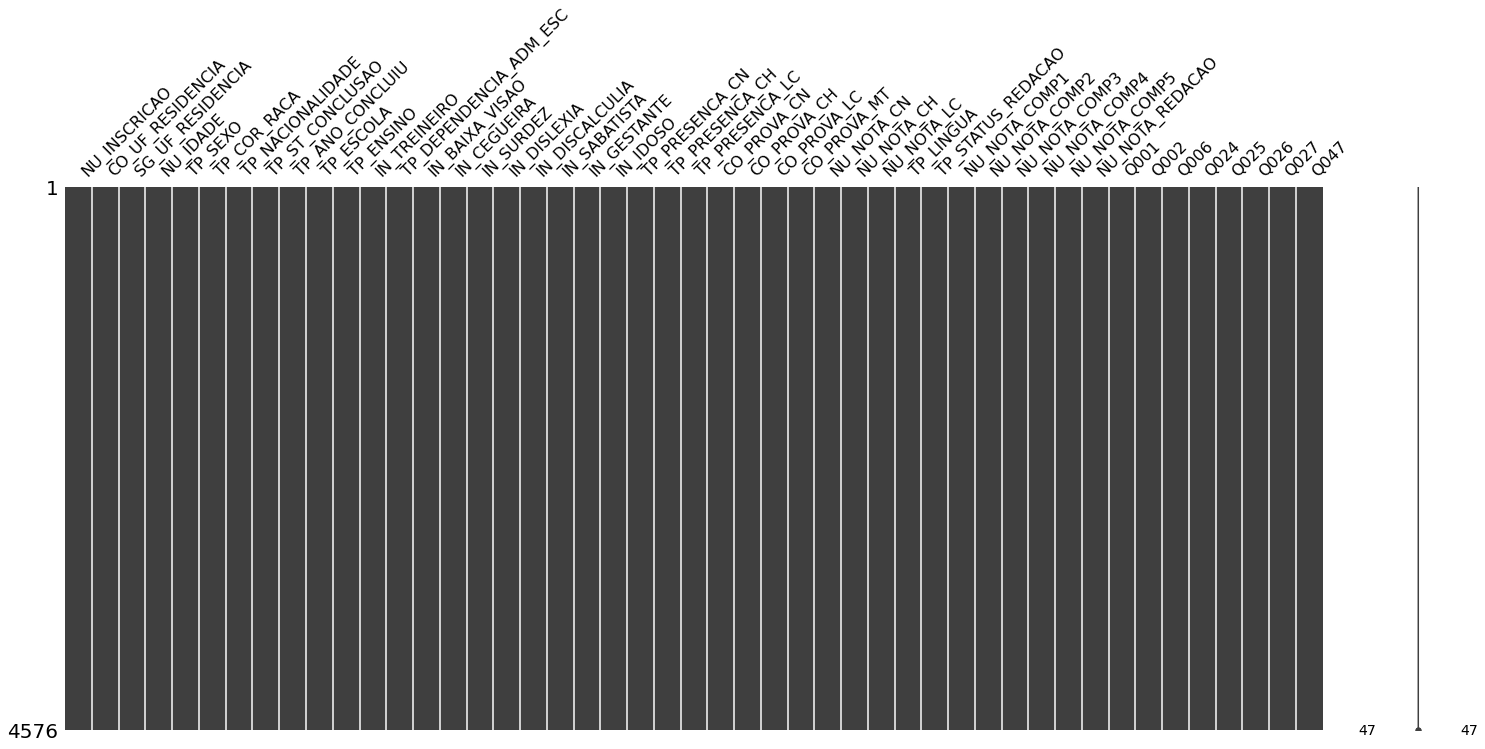

In [117]:
mtx = msno.matrix(df_t)

In [171]:
co_provas = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']
df_co_prova = df_t[co_provas]
df_co_prova.head()

df_co_prova = pd.get_dummies(df_co_prova)

df_t = df_t.drop(co_provas, axis=1)

df_t = pd.concat([df_t, df_co_prova], axis=1)

df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,-1,A,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,-1,A,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,-1,A,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [172]:
df_t = pd.concat([df_t, pd.get_dummies(df_t['TP_SEXO'])], axis=1)

df_t = df_t.drop('TP_SEXO', axis=1)

df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,B,A,C,A,A,C,C,A,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,E,B,C,B,B,B,F,A,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,E,E,D,B,B,A,-1,A,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,H,E,G,B,B,A,-1,A,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,D,H,H,C,B,A,-1,A,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [173]:
qColsFact = ['Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

for i in qColsFact:
    df_t[i], uniques = pd.factorize(df_t[i], sort=True)

df_t.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,1,0,2,0,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,4,1,2,1,1,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,4,4,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,6,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,3,7,7,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [174]:
answer = df_t['NU_INSCRICAO']  
#df_test['NU_INSCRICAO'], uniques = pd.factorize(df_test.NU_INSCRICAO, sort=True)
df_t = df_t.drop('NU_INSCRICAO', axis=1)
df_t = df_t.drop('SG_UF_RESIDENCIA', axis=1)

print(answer.head(5))

df_t.head(5)

0    73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1    71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2    b38a03232f43b11c9d0788abaf060f7366053b6d
3    70b682d9a3636be23f6120fa9d6b164eb3c6002d
4    715494628a50142ce8cb17191cfe6d0f3cae0934
Name: NU_INSCRICAO, dtype: object


,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M
0,41,22,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,1,0,2,0,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,21,26,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,4,1,2,1,1,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,23,21,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,4,4,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,15,27,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,6,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,41,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,3,7,7,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [175]:
print(df_x.shape)
print(df_t.shape)

(13730, 80)
(4576, 78)


In [176]:
for i in df_x.columns:
    if i not in df_t.columns:
        print(i)

CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0
CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee


In [177]:
df_t['CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0'] = 0
df_t['CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee'] = 0
df_t.head()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,CO_PROVA_CN_03b1fba5c1ebbc47988cd303b08982cfb2aa9cf2,CO_PROVA_CN_16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,CO_PROVA_CN_1bcdece8fb1b952552b319e4e5512bbcf540e338,CO_PROVA_CN_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CN_66b1dad288e13be0992bae01e81f71eca1c6e8a6,CO_PROVA_CN_69ed2ddcb151cfebe3d2ae372055335ac7c8c144,CO_PROVA_CN_b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,CO_PROVA_CN_c8328ebc6f3238e06076c481bc1b82b8301e7a3f,CO_PROVA_CN_c87a85497686b3e7b3765f84a2ca95256f0f66aa,CO_PROVA_CH_0fb4772fc6ee9b951ade2fbe6699cc37985c422e,CO_PROVA_CH_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_CH_6c3fec2ef505409a9e7c3d2e8634fa2aced4ee93,CO_PROVA_CH_909237ab0d84688e10c0470e2997348aff585273,CO_PROVA_CH_942ab3dc020af4cf53740b6b07e9dd7060b24164,CO_PROVA_CH_9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,CO_PROVA_CH_c95541bf218d7ff70572ca4bcb421edeff05c6d5,CO_PROVA_CH_f48d390ab6a2428e659c37fb8a9d00afde621889,CO_PROVA_CH_f94e97c2a5689edd5369740fde9a927e23a9465f,CO_PROVA_LC_01abbb7f1a90505385f44eec9905f82ca2a42cfd,CO_PROVA_LC_01af53cd161a420fff1767129c10de560cc264dd,CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_LC_44b09b311799bd684b3d02463bfa99e472c6adb3,CO_PROVA_LC_481058938110a64a272266e3892102b8ef0ca96f,CO_PROVA_LC_5aebe5cad7fabc1545ac7fba07a4e6177f98483c,CO_PROVA_LC_72f80e4b3150c627c7ffc93cfe0fa13a9989b610,CO_PROVA_LC_9cbf6bf31d9d89a64ce2737ece4834fde4a95029,CO_PROVA_LC_fa86b01f07636b15adfd66b688c79934730721a6,CO_PROVA_MT_0e0082361eaceb6418bb17305a2b7912650b4783,CO_PROVA_MT_0ec1c8ac02d2747b6e9a99933fbf96127dd6e89e,CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf,CO_PROVA_MT_577f8968d95046f5eb5cc158608e12fa9ba34c85,CO_PROVA_MT_6d6961694e839531aec2d35bbd8552b55394a0d7,CO_PROVA_MT_73c5c86eef8f70263e4c5708d153cca123f93378,CO_PROVA_MT_767a32545304ed293242d528f54d4edb1369f910,CO_PROVA_MT_81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,CO_PROVA_MT_97caab1e1533dba217deb7ef41490f52e459ab01,F,M,CO_PROVA_CN_a27a1efea095c8a973496f0b57a24ac6775d95b0,CO_PROVA_CH_d5f6d17523d2cce3e4dc0a7f0582a85cec1c15ee
0,41,22,3,1,1,5,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,464.8,443.5,431.8,0,1.0,120.0,80.0,80.0,100.0,40.0,420.0,1,0,2,0,0,2,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,21,26,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,1,1,1,391.1,491.1,548.0,1,1.0,120.0,120.0,120.0,120.0,100.0,580.0,4,1,2,1,1,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,23,21,1,1,2,0,2,3.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,595.9,622.7,613.6,0,1.0,80.0,40.0,40.0,80.0,80.0,320.0,4,4,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,15,27,3,1,1,8,1,-1.0,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,4,6,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,41,18,1,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,592.9,492.6,571.4,1,1.0,100.0,80.0,60.0,80.0,0.0,320.0,3,7,7,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


## Predição

In [135]:
pred = model.predict(df_t)

## Exportação

In [179]:
df_csv = pd.DataFrame(answer)
pred_csv = pd.DataFrame(pred)

#df_csv['NU_NOTA_MT'] = round(pred_csv, 2)
df_csv['NU_NOTA_MT'] = pred_csv
                             
df_csv.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,402.456367
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,440.660296
2,b38a03232f43b11c9d0788abaf060f7366053b6d,569.602185
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,282.336762
4,715494628a50142ce8cb17191cfe6d0f3cae0934,529.240905
5,e656d6bad65c93fb2880f1eba5037008c8e75774,436.444832
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,557.366516
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,378.106868
8,043c544a2104aa8a9849f1a703a08d37a2f16839,458.429803
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,413.161587


In [180]:
for idx, row in df_csv.iterrows():
    nuInscricao = row['NU_INSCRICAO']
    
    dfq = df_test.query('NU_INSCRICAO == @nuInscricao')['NU_NOTA_CN']
    if (dfq.values <= 0):
        df_csv.loc[idx, 'NU_NOTA_MT'] = 0
        
df_csv.head(10)

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,402.456367
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,440.660296
2,b38a03232f43b11c9d0788abaf060f7366053b6d,569.602185
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.000000
4,715494628a50142ce8cb17191cfe6d0f3cae0934,529.240905
5,e656d6bad65c93fb2880f1eba5037008c8e75774,436.444832
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,557.366516
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,378.106868
8,043c544a2104aa8a9849f1a703a08d37a2f16839,458.429803
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,413.161587


In [181]:
df_csv.to_csv('answer.csv', index = False, header=True)